In [18]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [19]:
#load cleansed data
df_public_event = pd.read_csv('/content/Cleansed_Data_v.3.csv')

In [20]:
df_public_event.loc[df_public_event['PublicEventClosing'] == 0, 'PublicEventClosing_Definition'] = 'No_Measure'
df_public_event.loc[df_public_event['PublicEventClosing'] == 1, 'PublicEventClosing_Definition'] = 'Recommend_Cancelling'
df_public_event.loc[df_public_event['PublicEventClosing'] == 2, 'PublicEventClosing_Definition'] = 'Require_Cancelling'

In [21]:
df_public_event = df_public_event [['Country',
                                                   'State',
                                                   'Date',
                                                   'PublicEventClosing_Definition',

                                                   ]]

In [22]:
df_workplace_graph = df_public_event.groupby(['State','PublicEventClosing_Definition'])['Date'].count().reset_index(name='Counts')

In [23]:
df_graph_visual = pd.pivot_table(df_workplace_graph, values = 'Counts', index = ['State'],columns = 'PublicEventClosing_Definition').reset_index()

In [24]:
df_graph_visual

PublicEventClosing_Definition,State,Recommend_Cancelling,Require_Cancelling
0,Alabama,165.0,81.0
1,Alaska,194.0,52.0
2,Arizona,143.0,103.0
3,Arkansas,208.0,38.0
4,California,NaN,246.0
5,Colorado,155.0,91.0
6,Connecticut,136.0,110.0
7,Delaware,74.0,172.0
8,Florida,53.0,193.0
9,Georgia,19.0,227.0


Text(0, 0.5, 'Number of Days')

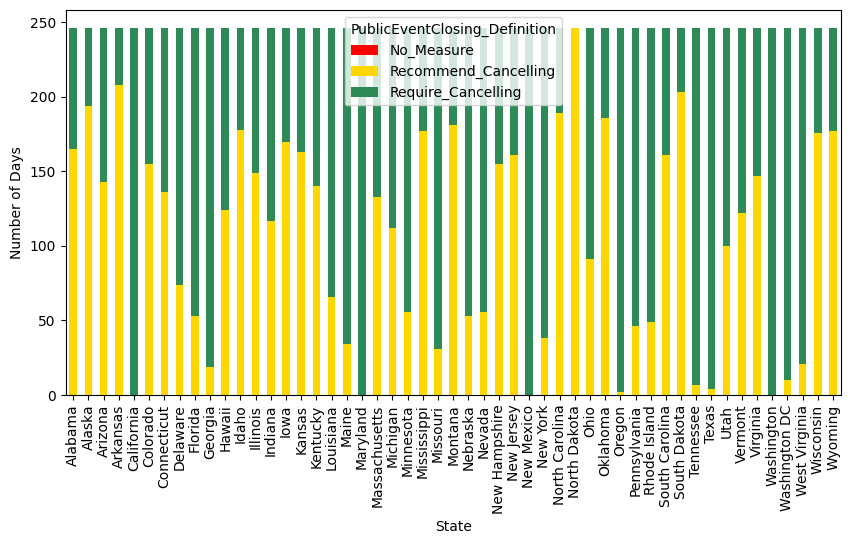

In [30]:
import matplotlib.pyplot as plt
if "No_Measure" not in df_graph_visual.columns:
  df_graph_visual = df_graph_visual.assign(No_Measure = 0)
colors = ["red", "gold", "seagreen"]
df_graph_visual. plot(x = "State", y = ["No_Measure","Recommend_Cancelling", "Require_Cancelling"], kind = "bar", stacked = "true", figsize = (10,5),color = colors)
plt.ylabel("Number of Days")